# Introduction:

Diabetes is a growing health concern affecting millions of people worldwide. It is a chronic disease characterized by high blood sugar levels, which can lead to various complications if not properly managed. In this project, we will build a diabetes prediction app using machine learning techniques.

## Problem Description:

Diabetes is a silent killer and early detection and proper management can prevent its complications. The aim of this project is to build a machine learning model that can accurately predict the likelihood of an individual developing diabetes based on various health parameters such as age, BMI, blood pressure, etc. This will help individuals take preventative measures and seek medical attention at an early stage.

![Medical](https://wallpaperaccess.com/full/3701981.jpg)

## Methodology:

The machine learning model will be trained on a large dataset containing the health parameters of individuals along with their diabetes status. Using this training data, the model will learn to identify patterns and relationships between the parameters and diabetes. The model will then use this knowledge to make predictions on new, unseen data.

We will use a supervised learning technique, specifically, classification algorithms like K-Nearest Neighbors (KNN), Decision Trees, Logistic Regression, etc., to build the diabetes prediction app. The performance of the model will be evaluated using metrics such as accuracy, precision, recall, and F1-score.


In [1]:
#Importing Libraries and packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection and Analysis

PIMA Diabetes Dataset(Phoenix Indian Medical Center) Diabetes dataset is a widely used dataset for machine learning and predictive modeling in the field of diabetes. It contains medical records of 768 female patients with 8 characteristics (predictors) such as number of pregnancies, glucose concentration, blood pressure, skin thickness, insulin level, BMI, age and a response variable, which is a binary classification indicating whether the patient has diabetes or not.

The PIMA Diabetes dataset is an excellent dataset for training and evaluating machine learning models, particularly for binary classification problems. It has been used in many studies and is a popular dataset for educational and research purposes. With its balanced distribution of positive and negative cases and a relatively small number of features, it is an accessible and suitable dataset for those starting out in the field of machine learning and predictive modeling.

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('Dataset/diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning (Dealing With Null Values)

Handling null or missing values in a dataset is an important step in the pre-processing phase of a machine learning project. Null values can negatively impact the performance of a machine learning model and may lead to incorrect predictions if not handled properly.

There are several ways to deal with null values in a dataset, and the most appropriate method depends on the type of data and the specific requirements of the project. Some common techniques for handling null values include:

- Dropping the rows with null values: This approach is suitable when the number of null values is relatively small and does not significantly impact the overall size of the dataset. However, it may not be appropriate if the number of null values is high and may result in a loss of important information.

- Imputing the missing values: This involves replacing the null values with a statistical estimate, such as the mean, median, or mode of the relevant feature. Imputing the missing values can help to retain the overall structure of the dataset and prevent the loss of information.

- Interpolation: This involves estimating the missing values based on the values of other features in the same row.

- Predicting missing values: Another option is to use machine learning algorithms to predict missing values based on the values of other features in the dataset.

In [6]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col].replace(0, np.NaN, inplace=True)
    
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [8]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preprocessing (Dealing With Imbalanced Data )

Dealing with imbalanced data is an important step in the pre-processing phase of a machine learning project. Imbalanced data refers to a situation where the number of instances in one class is significantly lower than the number of instances in another class. This can lead to problems during training, as the model may be biased towards the majority class, leading to poor performance on the minority class.

There are several techniques to deal with imbalanced data, including:

- Over-sampling the minority class: This involves creating additional instances of the minority class to balance the data distribution. However, this approach can lead to overfitting, as the model may learn the noise in the synthetic data.

- Under-sampling the majority class: This involves removing instances from the majority class to balance the data distribution. This approach can lead to loss of information and reduction in the overall size of the dataset.

- Synthetic minority oversampling technique (SMOTE): This is a popular and widely used technique that generates synthetic instances of the minority class by interpolating between existing instances.

- Class weight adjustment: This involves adjusting the loss function of the model to penalize misclassification of the minority class more heavily than misclassification of the majority class.

- Combination techniques: Another option is to combine multiple techniques, such as over-sampling the minority class and under-sampling the majority class, to achieve the best results.

The choice of the appropriate technique depends on the specific requirements of the project and the size of the dataset. It's important to carefully consider the pros and cons of each method and choose the one that is most suitable for the problem at hand.


In [9]:
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [11]:
# separating into 2 dataframes, one for each class 

df0 = df[df['Outcome'] == 0]
df1 = df[df['Outcome'] == 1]

In [12]:
print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

# Upsampling 

df1 = df1.sample(len(df0), replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

Number of samples in:
Class label 0 -  262
Class label 1 -  130

After resampling - 
Number of samples in:
Class label 0 -  262
Class label 1 -  262


In [13]:
df = pd.concat([df1, df0])

print('Total number of samples:', len(df))

Total number of samples: 524


## Data Splitting 

Data splitting is the process of dividing a dataset into multiple subsets, typically into training and test sets. The purpose of data splitting is to have different subsets of data for different purposes, such as training a machine learning model and evaluating its performance on unseen data.

In general, data splitting is performed as follows:

- The training set is used to train the machine learning model. It should be large enough to capture the underlying patterns in the data, but not too large as to overfit the model to the training data.

- The test set is used to evaluate the performance of the trained model on unseen data. The test set should be independent of the training set and should reflect the distribution of the real-world data that the model will encounter in practice.

The most common method to split the data is to randomly divide the data into two parts, training set (70-80%) and test set (20-30%).

In [14]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1).values
y = df['Outcome'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

## Data Preprocessing (Scaling & Standardization)

Scaling is a preprocessing step in machine learning that involves transforming the features of a dataset to a common scale. The purpose of scaling is to ensure that all features are on a similar scale and to prevent some features from dominating others. Scaling is particularly important for algorithms that are sensitive to the scale of the input features, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM).

There are several methods to scale the data, including:

- Min-Max Scaling: This method scales the data between 0 and 1 by subtracting the minimum value of the feature and dividing by the range (maximum value - minimum value).

- Standard Scaling: This method scales the data to have a mean of zero and a standard deviation of one.

- Normalization: This method scales the data to have a length (L2 norm) of one.

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(524, 8) (419, 8) (105, 8)


## Data Modeling

Data modeling is the process of building a machine learning model to make predictions on new data. This process involves selecting a suitable algorithm, training the model on the training data, and evaluating its performance on the test data.

Support Vector Machine (SVM) is a popular machine learning algorithm for classification problems, where the goal is to predict a binary or multiclass outcome. SVM works by finding the hyperplane that best separates the data into different classes.

In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation & Accuracy Score

Model evaluation is the process of measuring the performance of a machine learning model on a test dataset. The goal of model evaluation is to determine how well the model is able to make predictions on new, unseen data.

Accuracy score is one of the most commonly used metrics for evaluating the performance of a classifier. It is defined as the ratio of the number of correct predictions to the total number of predictions. In other words, it measures the proportion of the test data that the model has classified correctly.

In [21]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8042959427207638


In [22]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8


## Modeling with XGBoost

XGBoost (eXtreme Gradient Boosting) is a popular machine learning algorithm for both regression and classification problems. It is an ensemble method that trains multiple decision trees and combines their predictions to make a final prediction. XGBoost is known for its high performance and scalability, making it a popular choice for large-scale machine learning projects.

In [23]:
import xgboost as xgb

In [24]:
# create the model
clf = xgb.XGBClassifier()

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the model's performance
accuracy = (y_pred == y_test).mean()
print("Accuracy: ", accuracy)

Accuracy:  0.8857142857142857


In [25]:
# accuracy score on the training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [26]:
# accuracy score on the test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8857142857142857


## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to achieve better performance. Hyperparameters are parameters that are not learned from the data during the training process, but are set before training starts. Examples of hyperparameters in XGBoost include learning_rate, max_depth, n_estimators, gamma, etc.

In [30]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150]}

# create the model
clf = xgb.XGBClassifier()

# perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'max_depth': 3, 'n_estimators': 100}


## Model Saving for Deployment

After training a machine learning model, you may want to save it for deployment in a production environment. This allows you to reuse the model without having to retrain it every time you need to make predictions.

In [43]:
import pickle

filename = 'diabetes_model_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [28]:
model = pickle.load(open('diabetes_model.pkl', 'rb'))

In [29]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data = input_data.reshape(1,-1)

# standardize the input data
scaled_data = scaler.transform(input_data)
print(scaled_data)

prediction = model.predict(scaled_data)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.50896537  1.1759466   0.04657374 -1.0882643   0.04418979 -1.12091513
   0.12960628  1.9012827 ]]
[1]
The person is diabetic


## Data Modeling With Neural Networks (DeepLearning)

Neural networks, also known as deep learning, are a type of machine learning algorithm that are based on the structure and function of the human brain. Neural networks can be used for a variety of tasks, including image classification, natural language processing, and prediction.

In [31]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

In [32]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 7

In [33]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [34]:
checkpointer = ModelCheckpoint('diabetes.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(X_train, y_train, batch_size=16, epochs=350, validation_data=(X_test, y_test), callbacks=[checkpointer])

Epoch 1/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6938 - acc: 0.4740 
Epoch 1: val_acc improved from -inf to 0.56190, saving model to diabetes.h5
27/27 [==============================] - 3s 32ms/step - loss: 0.6937 - acc: 0.4702 - val_loss: 0.6910 - val_acc: 0.5619
Epoch 2/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6909 - acc: 0.5769
Epoch 2: val_acc did not improve from 0.56190
27/27 [==============================] - 0s 8ms/step - loss: 0.6907 - acc: 0.5752 - val_loss: 0.6908 - val_acc: 0.5333
Epoch 3/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6923 - acc: 0.5000
Epoch 3: val_acc did not improve from 0.56190
27/27 [==============================] - 0s 7ms/step - loss: 0.6923 - acc: 0.4988 - val_loss: 0.6906 - val_acc: 0.5524
Epoch 4/350
23/27 [========================>.....] - ETA: 0s - loss: 0.6918 - acc: 0.5245
Epoch 4: val_acc did not improve from 0.56190
27/27 [==============================] - 0s 8ms/step - loss: 0.6920

27/27 [==============================] - 0s 8ms/step - loss: 0.6847 - acc: 0.6110 - val_loss: 0.6812 - val_acc: 0.7238
Epoch 32/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6833 - acc: 0.5990
Epoch 32: val_acc did not improve from 0.73333
27/27 [==============================] - 0s 8ms/step - loss: 0.6827 - acc: 0.5895 - val_loss: 0.6805 - val_acc: 0.7238
Epoch 33/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6843 - acc: 0.6100
Epoch 33: val_acc did not improve from 0.73333
27/27 [==============================] - 0s 7ms/step - loss: 0.6837 - acc: 0.6110 - val_loss: 0.6795 - val_acc: 0.7238
Epoch 34/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6853 - acc: 0.5409
Epoch 34: val_acc did not improve from 0.73333
27/27 [==============================] - 0s 7ms/step - loss: 0.6850 - acc: 0.5442 - val_loss: 0.6788 - val_acc: 0.7143
Epoch 35/350
27/27 [==============================] - ETA: 0s - loss: 0.6840 - acc: 0.5990
Epoch 35: val_acc d

Epoch 95/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6644 - acc: 0.6298
Epoch 95: val_acc did not improve from 0.75238
27/27 [==============================] - 0s 7ms/step - loss: 0.6642 - acc: 0.6325 - val_loss: 0.6276 - val_acc: 0.7524
Epoch 96/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6668 - acc: 0.6490
Epoch 96: val_acc did not improve from 0.75238
27/27 [==============================] - 0s 8ms/step - loss: 0.6658 - acc: 0.6516 - val_loss: 0.6270 - val_acc: 0.7429
Epoch 97/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6494 - acc: 0.6484
Epoch 97: val_acc did not improve from 0.75238
27/27 [==============================] - 0s 8ms/step - loss: 0.6550 - acc: 0.6468 - val_loss: 0.6259 - val_acc: 0.7524
Epoch 98/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6621 - acc: 0.6484
Epoch 98: val_acc did not improve from 0.75238
27/27 [==============================] - 0s 8ms/step - loss: 0.6602 - acc: 0.6492 - val_los

Epoch 127/350
27/27 [==============================] - ETA: 0s - loss: 0.6588 - acc: 0.6706
Epoch 127: val_acc did not improve from 0.75238
27/27 [==============================] - 0s 7ms/step - loss: 0.6588 - acc: 0.6706 - val_loss: 0.6002 - val_acc: 0.7524
Epoch 128/350
27/27 [==============================] - ETA: 0s - loss: 0.6257 - acc: 0.6802
Epoch 128: val_acc improved from 0.75238 to 0.76190, saving model to diabetes.h5
27/27 [==============================] - 0s 11ms/step - loss: 0.6257 - acc: 0.6802 - val_loss: 0.5994 - val_acc: 0.7619
Epoch 129/350
23/27 [========================>.....] - ETA: 0s - loss: 0.6528 - acc: 0.6658
Epoch 129: val_acc did not improve from 0.76190
27/27 [==============================] - 0s 8ms/step - loss: 0.6507 - acc: 0.6683 - val_loss: 0.5987 - val_acc: 0.7619
Epoch 130/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6539 - acc: 0.6538
Epoch 130: val_acc did not improve from 0.76190
27/27 [==============================] - 0s 8ms/s

27/27 [==============================] - 0s 8ms/step - loss: 0.6184 - acc: 0.7064 - val_loss: 0.5865 - val_acc: 0.7619
Epoch 159/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6277 - acc: 0.7100
Epoch 159: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6268 - acc: 0.7064 - val_loss: 0.5856 - val_acc: 0.7714
Epoch 160/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6341 - acc: 0.6901
Epoch 160: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6316 - acc: 0.6945 - val_loss: 0.5847 - val_acc: 0.7714
Epoch 161/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6309 - acc: 0.7067
Epoch 161: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6303 - acc: 0.7088 - val_loss: 0.5842 - val_acc: 0.7714
Epoch 162/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6331 - acc: 0.6650
Epoch 162: v

Epoch 222/350
27/27 [==============================] - ETA: 0s - loss: 0.6036 - acc: 0.7041
Epoch 222: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6036 - acc: 0.7041 - val_loss: 0.5673 - val_acc: 0.7429
Epoch 223/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6553 - acc: 0.6797
Epoch 223: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6494 - acc: 0.6802 - val_loss: 0.5677 - val_acc: 0.7429
Epoch 224/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6122 - acc: 0.6851
Epoch 224: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6107 - acc: 0.6874 - val_loss: 0.5673 - val_acc: 0.7429
Epoch 225/350
15/27 [===============>..............] - ETA: 0s - loss: 0.6501 - acc: 0.6708
Epoch 225: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.5993 - acc: 0.7112 -

Epoch 254/350
27/27 [==============================] - ETA: 0s - loss: 0.5984 - acc: 0.6850
Epoch 254: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.5984 - acc: 0.6850 - val_loss: 0.5623 - val_acc: 0.7429
Epoch 255/350
27/27 [==============================] - ETA: 0s - loss: 0.5948 - acc: 0.7017
Epoch 255: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.5948 - acc: 0.7017 - val_loss: 0.5619 - val_acc: 0.7429
Epoch 256/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6135 - acc: 0.6700
Epoch 256: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 9ms/step - loss: 0.6120 - acc: 0.6706 - val_loss: 0.5616 - val_acc: 0.7429
Epoch 257/350
27/27 [==============================] - ETA: 0s - loss: 0.6050 - acc: 0.6897
Epoch 257: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6050 - acc: 0.6897 -

Epoch 286/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6269 - acc: 0.7200
Epoch 286: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6274 - acc: 0.7184 - val_loss: 0.5524 - val_acc: 0.7429
Epoch 287/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6039 - acc: 0.7214
Epoch 287: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.6007 - acc: 0.7255 - val_loss: 0.5525 - val_acc: 0.7429
Epoch 288/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6102 - acc: 0.6875
Epoch 288: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6093 - acc: 0.6874 - val_loss: 0.5519 - val_acc: 0.7429
Epoch 289/350
23/27 [========================>.....] - ETA: 0s - loss: 0.6208 - acc: 0.7092
Epoch 289: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6168 - acc: 0.7184 -

Epoch 318/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6039 - acc: 0.6756
Epoch 318: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6094 - acc: 0.6874 - val_loss: 0.5427 - val_acc: 0.7429
Epoch 319/350
26/27 [===========================>..] - ETA: 0s - loss: 0.5790 - acc: 0.7524
Epoch 319: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 7ms/step - loss: 0.5780 - acc: 0.7542 - val_loss: 0.5423 - val_acc: 0.7429
Epoch 320/350
24/27 [=========================>....] - ETA: 0s - loss: 0.5955 - acc: 0.7109
Epoch 320: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.5951 - acc: 0.7112 - val_loss: 0.5422 - val_acc: 0.7429
Epoch 321/350
22/27 [=======================>......] - ETA: 0s - loss: 0.6061 - acc: 0.7244
Epoch 321: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6082 - acc: 0.7255 -

Epoch 350/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6035 - acc: 0.6971
Epoch 350: val_acc did not improve from 0.77143
27/27 [==============================] - 0s 8ms/step - loss: 0.6036 - acc: 0.6969 - val_loss: 0.5349 - val_acc: 0.7429


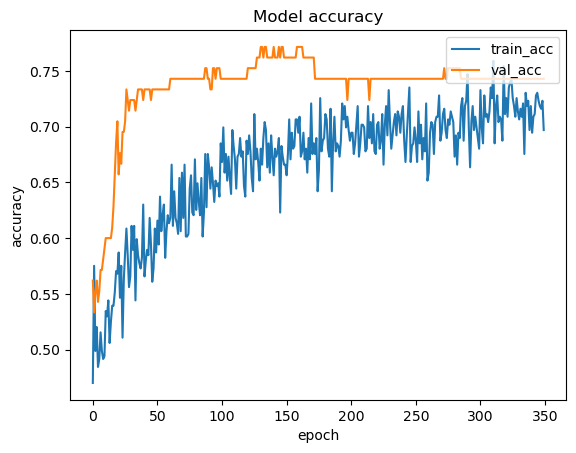

In [35]:
import matplotlib.pyplot as plt

# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

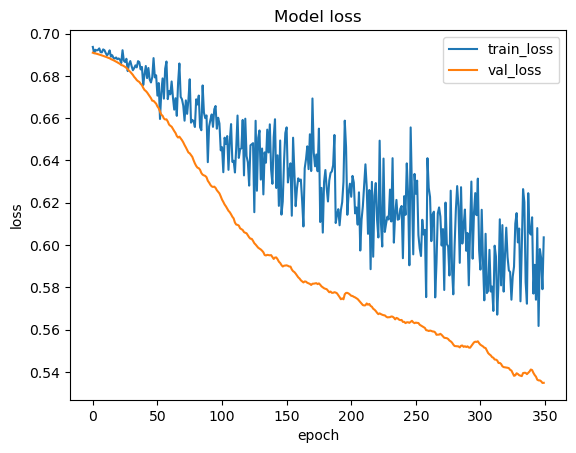

In [36]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [37]:
present_model = keras.models.load_model('diabetes.h5')

In [38]:
# predicting on test data.
pred_test = present_model.predict(X_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

4/4 [==============================] - 0s 5ms/step


In [39]:
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Not Diabetic")
        else:
            print("Diabetic")

In [40]:
view_result(pred_test[:10])


Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic


In [41]:
view_result(y_test[:10])


Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Not Diabetic
Diabetic
Diabetic
Diabetic
Diabetic


## Making a Predictive System



In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.50896537  1.1759466   0.04657374 -1.0882643   0.04418979 -1.12091513
   0.12960628  1.9012827 ]]
[1]
The person is diabetic


## Conclusion:

The diabetes prediction app will be a valuable tool for individuals to assess their risk of developing diabetes and take necessary steps to prevent it. The app will also serve as a proof-of-concept for the use of machine learning in healthcare and has the potential to be further developed and applied to other diseases as well.